# database connection

In [5]:
import pymysql

# Function to execute an SQL file
def execute_sql_file(filepath, connection):
    with open(filepath, 'r') as sql_file:
        sql_script = sql_file.read()
    with connection.cursor() as cursor:
        for statement in sql_script.split(';'): 
            if statement.strip():
                cursor.execute(statement)




# Connect to MySQL without specifying a database
connection = pymysql.connect(host='localhost',
                            user='root',
                            password='Shinyway001.')

try:
    with connection.cursor() as cursor:
        # Create a new database named 'smartcine'
        cursor.execute("CREATE DATABASE IF NOT EXISTS smartcine")
        print("Database created successfully")
except pymysql.MySQLError as e:
    print(f"An error occurred: {e}")
# finally:
    # connection.close()

try:
    # Execute the SQL file to create tables
    execute_sql_file('init_db.sql', connection)
    connection.commit()  # Commit changes
    print("Tables created successfully.")
except pymysql.MySQLError as e:
    print(f"An error occurred: {e}")
finally:
    connection.close()  # Close the connection



Database created successfully
Tables created successfully.


# insert data

In [6]:
import pandas as pd
import mysql.connector
from mysql.connector import Error



def insert_csv_to_mysql(csv_file_path, table_name, column_names, date_columns = None):
    try:
        data = pd.read_csv(csv_file_path)

        # Debugging: Print column types before conversion
        print("Data types before conversion:", data.dtypes)
        # Convert date columns to the correct format (YYYY-MM-DD)
        if date_columns:
            for date_col in date_columns:
                data[date_col] = pd.to_datetime(data[date_col]).dt.strftime('%Y-%m-%d')

        # Convert int64 columns to Python's native int
        for col in data.columns:
            if pd.api.types.is_integer_dtype(data[col]):
                data[col] = data[col].astype(int)

        
        # Debugging: Print column types before insertion
        print("Data types after conversion:", data.dtypes)

        connection = mysql.connector.connect(host='localhost', database='smartcine', user='root', password='Shinyway001.')
        if connection.is_connected():
            cursor = connection.cursor()
            insert_query = f"INSERT INTO {table_name} ({', '.join(column_names)}) VALUES ({', '.join(['%s'] * len(column_names))})"
            
            for _, row in data.iterrows():
                # Convert each value to a type that's compatible with MySQL
                formatted_row = [int(row[col]) if pd.api.types.is_integer_dtype(data[col]) else row[col] for col in column_names]
                cursor.execute(insert_query, formatted_row)
                connection.commit()

            print("Data inserted successfully")

    except Error as e:
        print("Error while connecting to MySQL", e)

    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL connection is closed")



"""
csv_file_path = 'path_to_your_csv_file.csv'
table_name = 'your_table_name'
column_names = ['column1', 'column2', 'column3']  
List of column names in the same order as in your CSV
insert_csv_to_mysql(csv_file_path, table_name, column_names)
"""
insert_csv_to_mysql('./data/admin.csv', 'admin', ['admin_id', 'hire_date', 'admin_name', 'password'], ['hire_date'])
insert_csv_to_mysql('./data/customer.csv', 'customer', ['customer_id', 'password', 'email']) 
insert_csv_to_mysql('./data/theater.csv', 'theater', ['theater_id', 'name', 'location']) 
insert_csv_to_mysql('./data/movie.csv', 'movie', ['movie_id', 'title', 'director','release_date', 'duration'], ['release_date']) 
insert_csv_to_mysql('./data/modifyMovie.csv', 'modifyMovie', ['admin_id', 'movie_id']) 
insert_csv_to_mysql('./data/theater_room.csv', 'theater_room', ['room_id', 'available_seat','theater_id']) 
insert_csv_to_mysql('./data/review.csv', 'review', ['review_id', 'rating','comment','date', 'customer_id', 'movie_id'], ['date']) 
insert_csv_to_mysql('./data/card.csv', 'card', ['card_id', 'register_date','member_points','customer_id'], ['register_date']) 
insert_csv_to_mysql('./data/schedule.csv', 'schedule', ['schedule_id', 'time_slot','date','room_id'], ['date']) 
insert_csv_to_mysql('./data/ticket.csv', 'ticket', ['ticket_id','price','seat_num','card_id','schedule_id','movie_id']) 
insert_csv_to_mysql('./data/buyTicket.csv', 'buyTicket', ['ticket_id','customer_id']) 
insert_csv_to_mysql('./data/payment.csv', 'payment', ['payment_id','card_type','ticket_id']) 
insert_csv_to_mysql('./data/performance.csv', 'performance', ['performance_id','month','year','num_of_viewers','revenues','theater_id']) 



    # execute_sql_from_file(sql_file_path)


    # def execute_sql_from_file(file_path):
    # """
    # Executes SQL commands from a file on a MySQL database.
    # :param file_path: Path to the SQL file containing the SQL commands.
    # :param host_name: Host name of the MySQL server.
    # :param db_name: Name of the MySQL database.
    # :param user_name: Username for the MySQL database.
    # :param user_password: Password for the MySQL database.
    # """
    # try:
    #     # Read SQL commands from the file
    #     with open(file_path, 'r') as file:
    #         sql_commands = file.read()

    #     # Connect to the MySQL database
    #     connection = mysql.connector.connect(host='localhost', database='smartcine',
    #                                         user='root', password='Shinyway001.')
    #     if connection.is_connected():
    #         cursor = connection.cursor()

    #         # Execute each SQL command
    #         for command in sql_commands.split(';'):
    #             if command.strip():
    #                 cursor.execute(command)
    #                 connection.commit()

    #         print("SQL commands executed successfully")

    # except Error as e:
    #     print("Error while connecting to MySQL or executing SQL commands", e)

    # finally:
    #     if connection.is_connected():
    #         cursor.close()
    #         connection.close()
    #         print("MySQL connection is closed")

Data types before conversion: admin_id       int64
hire_date     object
admin_name    object
password      object
dtype: object
Data types after conversion: admin_id       int64
hire_date     object
admin_name    object
password      object
dtype: object
Data inserted successfully
MySQL connection is closed
Data types before conversion: customer_id     int64
password       object
email          object
dtype: object
Data types after conversion: customer_id     int64
password       object
email          object
dtype: object
Data inserted successfully
MySQL connection is closed
Data types before conversion: theater_id     int64
name          object
location      object
dtype: object
Data types after conversion: theater_id     int64
name          object
location      object
dtype: object
Data inserted successfully
MySQL connection is closed
Data types before conversion: movie_id         int64
title           object
director        object
release_date    object
duration         int64
dtype:

# connect to database and prepare to execute sql command

In [7]:
# connect to database and prepare to execute sql command
def execute_sql_command(sql_command):
    try:
        with connection.cursor() as cursor:
            cursor.execute(sql_command)
            connection.commit()
    except pymysql.MySQLError as e:
        print(f"An error occurred: {e}")
        
connection = pymysql.connect(host='localhost', user='root', password='Shinyway001.', db='smartcine')


# Views

In [14]:
view_movie = """
CREATE VIEW `ViewMovie` AS
SELECT *
FROM movie
"""
execute_sql_command(view_movie)



An error occurred: (1050, "Table 'ViewMovie' already exists")


In [15]:
view_customer = """
CREATE VIEW `ViewCustomer` AS
SELECT *
FROM customer
"""
execute_sql_command(view_customer)

In [16]:
view_ticket = """
CREATE VIEW `ViewTicket` AS
SELECT *
FROM ticket
"""
execute_sql_command(view_ticket)

# Stored Procedures

In [29]:
add_admin_sql = """
CREATE PROCEDURE `AddAdmin` (
    IN p_admin_id INT, 
    IN p_admin_name VARCHAR(255), 
    IN p_hire_date DATE, 
    IN p_password VARCHAR(255)
)
BEGIN
    INSERT INTO `Admin` (`admin_id`, `admin_name`, `hire_date`, `password`) 
    VALUES (p_admin_id, p_admin_name, p_hire_date, p_password);
END;
"""

execute_sql_command(add_admin_sql)


In [33]:
update_admin_password_sql = """
CREATE PROCEDURE `UpdateAdminPassword`(
    IN new_admin_id INT, 
    IN new_password VARCHAR(255)
)
BEGIN
    UPDATE `Admin` SET `password` = new_password WHERE `admin_id` = new_admin_id;
END;
"""

execute_sql_command(update_admin_password_sql)

# update admin passwords

In [34]:
delete_admin_sql = """
CREATE PROCEDURE `DeleteAdmin`(
    IN delete_admin_id INT
)
BEGIN
    DELETE FROM `Admin` WHERE `admin_id` = delete_admin_id;
END;
"""
execute_sql_command(delete_admin_sql)

# delete admin based on admin_id

# Functions

In [41]:
count_customer_sql = """
CREATE FUNCTION `count_customer`(customer_id_num int)
RETURNS INT
READS SQL DATA
BEGIN
    DECLARE customer_num INT;
    SELECT COUNT(*) INTO customer_num FROM customer where customer_id = customer_id_num ;
    RETURN customer_num;
END;
"""

execute_sql_command(count_customer_sql)


In [39]:
count_admin_sql = """
CREATE FUNCTION `count_admin`()
RETURNS INT
READS SQL DATA
BEGIN
    DECLARE admin_num INT;
    SELECT COUNT(*) INTO admin_num FROM admin;
    RETURN admin_num;
END;
"""

execute_sql_command(count_admin_sql)

In [40]:
count_movie_sql = """
CREATE FUNCTION `count_movie`()
RETURNS INT
READS SQL DATA
BEGIN
    DECLARE movie_num INT;
    SELECT COUNT(*) INTO movie_num FROM movie;
    RETURN movie_num;
END;
"""

execute_sql_command(count_movie_sql)

# Trigger

In [45]:
trigger_sql = """

CREATE TRIGGER validate_rating_before_insert
BEFORE INSERT ON Review
FOR EACH ROW
BEGIN
    IF NEW.rating < 1 OR NEW.rating > 5 THEN
        SIGNAL SQLSTATE '45000'
        SET MESSAGE_TEXT = 'Invalid rating value';
    END IF;
END;

"""
execute_sql_command(trigger_sql)

In [46]:
connection.close()

# Graph and Report

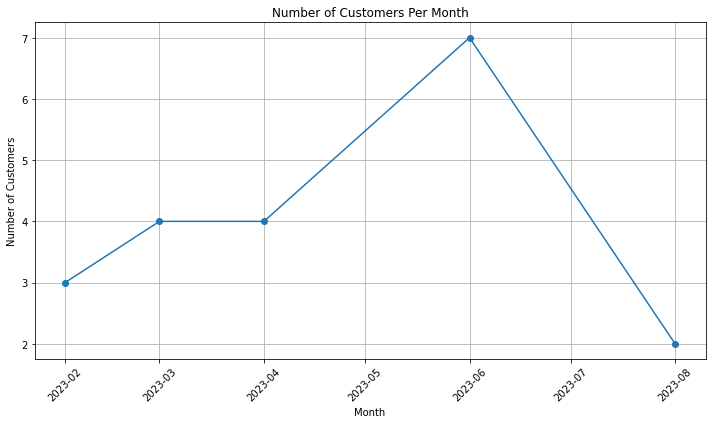

In [50]:
import pymysql
import matplotlib.pyplot as plt
from datetime import datetime

# Database connection parameters
conn = pymysql.connect(host='localhost',
                       user='root',
                       password='Shinyway001.',
                       db='SmartCine')  # Ensure this matches your database name

# Create a cursor object
cursor = conn.cursor()

# SQL query
sql = """
SELECT 
    YEAR(S.date) AS Year,
    MONTH(S.date) AS Month,
    COUNT(DISTINCT BT.customer_id) AS NumberOfCustomers
FROM 
    BuyTicket BT
JOIN 
    Ticket TI ON BT.ticket_id = TI.ticket_id
JOIN 
    Schedule S ON TI.schedule_id = S.schedule_id
GROUP BY 
    YEAR(S.date), MONTH(S.date)
ORDER BY 
    Year, Month;
"""

# Execute the query
cursor.execute(sql)
result = cursor.fetchall()

# Close the database connection
cursor.close()
conn.close()

# Extracting data for plotting
years_months = [datetime(year=row[0], month=row[1], day=1) for row in result]
customers = [row[2] for row in result]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years_months, customers, marker='o')
plt.title('Number of Customers Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


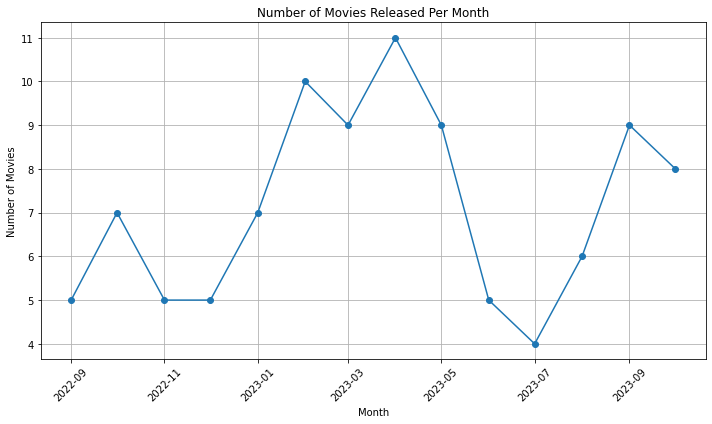

In [51]:
import pymysql
import matplotlib.pyplot as plt
from datetime import datetime

# Database connection parameters
conn = pymysql.connect(host='localhost',
                       user='root',
                       password='Shinyway001.',
                       db='SmartCine')  # Ensure this matches your database name

# Create a cursor object
cursor = conn.cursor()

# SQL query to count the number of movies released each month
sql = """
SELECT 
    YEAR(release_date) AS Year,
    MONTH(release_date) AS Month,
    COUNT(*) AS NumberOfMovies
FROM 
    Movie
GROUP BY 
    YEAR(release_date), MONTH(release_date)
ORDER BY 
    Year, Month;
"""

# Execute the query
cursor.execute(sql)
result = cursor.fetchall()

# Close the database connection
cursor.close()
conn.close()

# Extracting data for plotting
years_months = [datetime(year=row[0], month=row[1], day=1) for row in result]
movie_counts = [row[2] for row in result]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years_months, movie_counts, marker='o')
plt.title('Number of Movies Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
